In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np

### 1- Importando e visualizando os dados

In [2]:
df = pd.read_csv('pokemon_alopez247.csv', sep=',')
df.head()


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
# Encontrando valores vazios na base de dados para tratar

print(df.isnull().sum())

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64


### 2- Tratando os dados em branco 

In [4]:
# Pokémons podem ter 2 tipos mas nem todos possuem. Para não trabalhar com linhas em branco seguirei com a sugestão do Autor da base e repetirei os valores da coluna Type_1 em Type_2

df['Type_2'] = df['Type_2'].fillna(df['Type_1'])

# Egg_Group é um caso semelhante então seguiremos da mesma forma

df['Egg_Group_2'] = df['Egg_Group_2'].fillna(df['Egg_Group_1'])

print(df.isnull().sum())

Number               0
Name                 0
Type_1               0
Type_2               0
Total                0
HP                   0
Attack               0
Defense              0
Sp_Atk               0
Sp_Def               0
Speed                0
Generation           0
isLegendary          0
Color                0
hasGender            0
Pr_Male             77
Egg_Group_1          0
Egg_Group_2          0
hasMegaEvolution     0
Height_m             0
Weight_kg            0
Catch_Rate           0
Body_Style           0
dtype: int64


In [5]:
# Observando a Coluna Pr_Male para tratar:

df_Pr_Male_Na = df[df['Pr_Male'].isna()]

df_Pr_Male_Na

# Podemos observar que os Pokémons que possuem 'NaN' em Pr_Male (probabilidade de ser Macho) são aqueles que Não possuem gênero. 
# Podemos seguir de algumas formas dependendo da análise a ser feita como remover os valores Nan de Pr_Male (df = df.dropna(subset=['Pr_Male'])) ou até removendo as colunas
# Como o objetivo desse projeto é fazer gráficos irei manter as informações da base

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
80,81,Magnemite,Electric,Steel,325,25,35,70,95,55,...,Grey,False,NaN,Mineral,Mineral,False,0.30,6.0,190,head_arms
81,82,Magneton,Electric,Steel,465,50,60,95,120,70,...,Grey,False,NaN,Mineral,Mineral,False,0.99,60.0,60,multiple_bodies
99,100,Voltorb,Electric,Electric,330,40,30,50,55,55,...,Red,False,NaN,Mineral,Mineral,False,0.51,10.4,190,head_only
100,101,Electrode,Electric,Electric,480,60,50,70,80,80,...,Red,False,NaN,Mineral,Mineral,False,1.19,66.6,60,head_only
119,120,Staryu,Water,Water,340,30,45,55,70,55,...,Brown,False,NaN,Water_3,Water_3,False,0.79,34.5,225,head_base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,Undiscovered,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,Undiscovered,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,Undiscovered,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,Undiscovered,False,0.51,9.0,3,head_only


In [6]:
# Confirmando se há apenas valores falsos na tabela df_Pr_Male_Na
df_Pr_Male_Na['hasGender'].unique()  # Lista os valores únicos da coluna

array([False])

In [7]:
# Comparando com a nossa tabela original 
df['hasGender'].unique()

array([ True, False])

In [8]:
# Removendo colunas que não utilizaremos
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [9]:
df.drop(['Number', 'Height_m', "Weight_kg"], axis=1, inplace=True)

In [ ]:
df.to_excel('Base Pokémon.xlsx', index=False) # apenas exportando a Base tratada

### 3- Melhorando a visualização por meio de Gráficos 


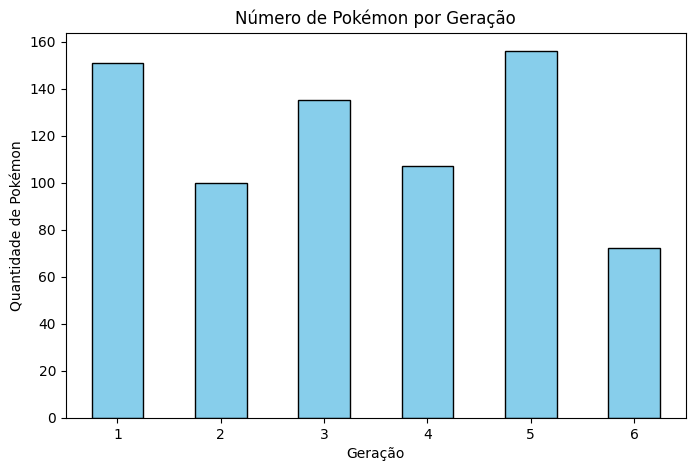

In [10]:
# Quantos Pokémonns tenho por geração 

Poke_Gen = df['Generation'].value_counts().sort_index() # sort index para manter a organização das gerações

plt.figure(figsize=(8, 5))
Poke_Gen.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Geração")
plt.ylabel("Quantidade de Pokémon")
plt.title("Número de Pokémon por Geração")
plt.xticks(rotation=0)
plt.show()

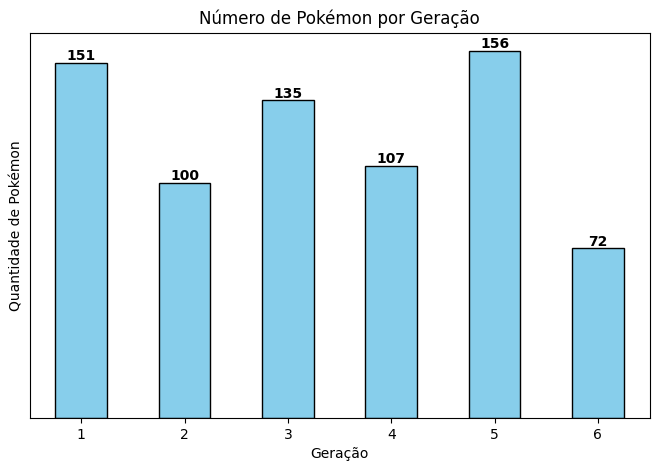

In [11]:
# Melhorando o gráfico anterior

Poke_Gen = df['Generation'].value_counts().sort_index() # sort index para manter a organização das gerações

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
bars = Poke_Gen.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionar valores no topo das barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2,  # Posição X -> Centralizar o texto no topo da barra 
             bar.get_height(),                 # Posição Y -> Altura da barra, onde será colocado o texto 
             int(bar.get_height()),            # Valor a ser exibido -> Altura em um número inteiro
             ha='center', va='bottom', fontsize=10, fontweight='bold') 

# Ajustes no gráfico
plt.xlabel("Geração")
plt.ylabel("Quantidade de Pokémon")
plt.title("Número de Pokémon por Geração")
plt.xticks(rotation=0)
plt.yticks([])
plt.show()

### Brincanco com Gráfico de Radar

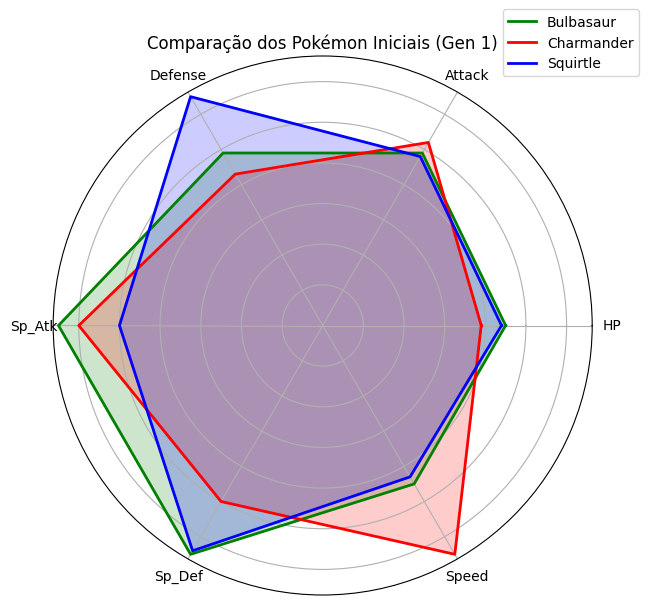

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Filtrar apenas os Pokémon iniciais da 1ª geração
starters = df[df['Name'].isin(['Bulbasaur', 'Charmander', 'Squirtle'])]

# 2. Selecionar apenas os atributos relevantes
attributes = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
values = starters[attributes].values

# 3. Criar ângulos para o gráfico de radar
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

# 4. Criar o gráfico de radar
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Cores para cada Pokémon
colors = ['green', 'red', 'blue']
labels = starters['Name'].values

for i, (label, color) in enumerate(zip(labels, colors)):
    stats = values[i].tolist()
    stats += stats[:1]  # Fechar o gráfico
    
    ax.plot(angles, stats, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, stats, color=color, alpha=0.2)  # Preenchimento

# 6. Configurações do gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)
ax.set_yticklabels([])
plt.title("Comparação dos Pokémon Iniciais (Gen 1)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


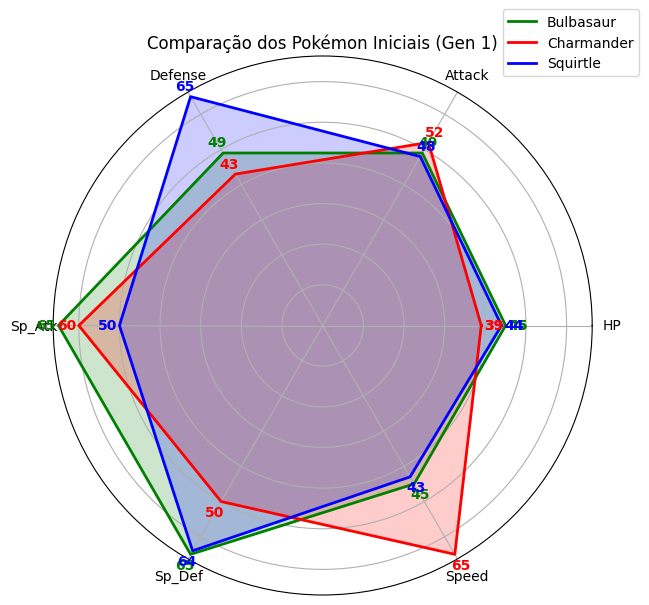

In [22]:
# 1. Filtrar apenas os Pokémon iniciais da 1ª geração
starters = df[df['Name'].isin(['Bulbasaur', 'Charmander', 'Squirtle'])]

# 2. Selecionar apenas os atributos relevantes
attributes = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
values = starters[attributes].values

# 3. Criar ângulos para o gráfico de radar
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

# 4. Criar o gráfico de radar
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Cores para cada Pokémon
colors = ['green', 'red', 'blue']
labels = starters['Name'].values

for i, (label, color) in enumerate(zip(labels, colors)):
    stats = values[i].tolist()
    stats += stats[:1]  # Fechar o gráfico
    
    ax.plot(angles, stats, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, stats, color=color, alpha=0.2)  # Preenchimento

        # 🔹 Adicionar os valores no meio do gráfico
    for angle, stat in zip(angles, stats):
        ax.text(angle, stat + 3, str(stat), ha='center', va='center', fontsize=10, color=color, fontweight='bold')

# 6. Configurações do gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)
ax.set_yticklabels([])
plt.title("Comparação dos Pokémon Iniciais (Gen 1)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

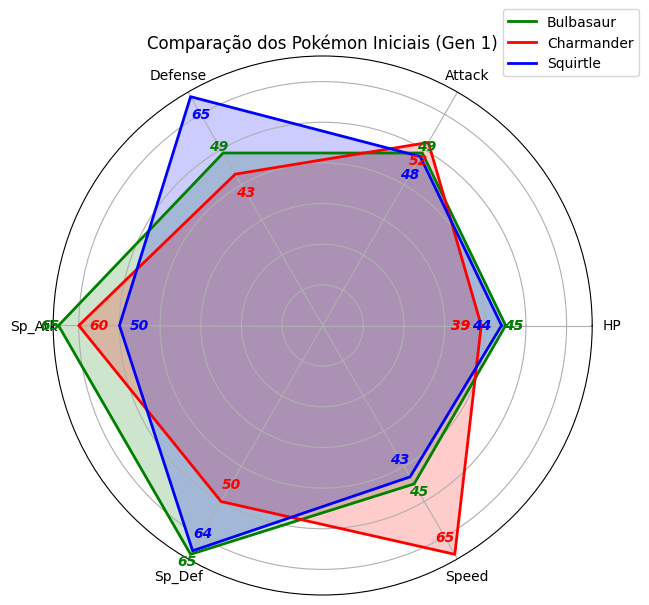

In [41]:
# 1. Filtrar apenas os Pokémon iniciais da 1ª geração
starters = df[df['Name'].isin(['Bulbasaur', 'Charmander', 'Squirtle'])]

# 2. Selecionar apenas os atributos relevantes
attributes = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
values = starters[attributes].values

# 3. Criar ângulos para o gráfico de radar
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

# 4. Criar o gráfico de radar
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Cores para cada Pokémon
colors = ['green', 'red', 'blue']
labels = starters['Name'].values

# Adicionar os valores numéricos, com deslocamento para evitar sobreposição 
offsets = {'Bulbasaur': (0, 2), 'Charmander': (2, -5), 'Squirtle': (-5, -5)}

for i, (label, color) in enumerate(zip(labels, colors)):
    stats = values[i].tolist()
    stats += stats[:1]  # Fechar o gráfico
    
    ax.plot(angles, stats, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, stats, color=color, alpha=0.2)  # Preenchimento

    # Adicionar os valores com deslocamento
    dx, dy = offsets[label]  # Obtém o deslocamento específico para cada Pokémon
    for angle, stat in zip(angles, stats):
        ax.text(angle, stat + dy, str(stat), ha='center', va='center', fontsize=10, 
                color=color, fontweight='bold', fontstyle='italic')


# 6. Configurações do gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)
ax.set_yticklabels([])
plt.title("Comparação dos Pokémon Iniciais (Gen 1)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

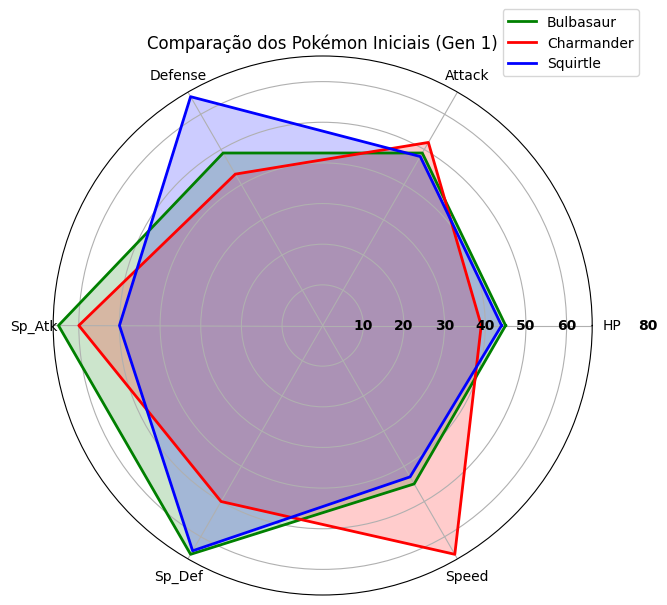

In [ ]:
# 1. Filtrar apenas os Pokémon iniciais da 1ª geração
starters = df[df['Name'].isin(['Bulbasaur', 'Charmander', 'Squirtle'])]

# 2. Selecionar apenas os atributos relevantes
attributes = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
values = starters[attributes].values

# 3. Criar ângulos para o gráfico de radar
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

# 4. Criar o gráfico de radar
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Cores para cada Pokémon
colors = ['green', 'red', 'blue']
labels = starters['Name'].values

# Adicionar numeração nos círculos internos para indicar escala
yticks = [10, 20, 30, 40, 50, 60, 80]  # Valores de referência
for y in yticks:
    ax.text(0, y, str(y), ha='center', va='center', fontsize=10, color='black', fontweight='bold')


for i, (label, color) in enumerate(zip(labels, colors)):
    stats = values[i].tolist()
    stats += stats[:1]  # Fechar o gráfico
    
    ax.plot(angles, stats, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, stats, color=color, alpha=0.2)  # Preenchimento

# 6. Configurações do gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)
ax.set_yticklabels([])
plt.title("Comparação dos Pokémon Iniciais (Gen 1)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

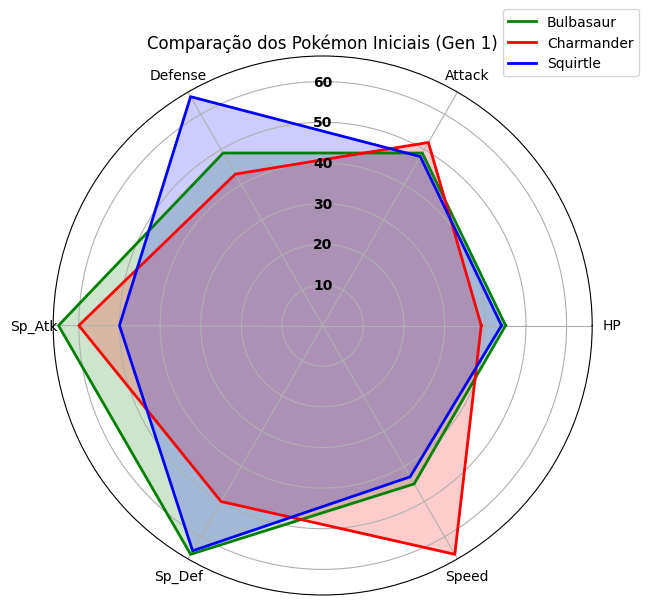

In [36]:
# 1. Filtrar apenas os Pokémon iniciais da 1ª geração
starters = df[df['Name'].isin(['Bulbasaur', 'Charmander', 'Squirtle'])]

# 2. Selecionar apenas os atributos relevantes
attributes = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
values = starters[attributes].values

# 3. Criar ângulos para o gráfico de radar
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

# 4. Criar o gráfico de radar
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Cores para cada Pokémon
colors = ['green', 'red', 'blue']
labels = starters['Name'].values

# Adicionar numeração nos círculos internos para indicar escala
yticks = [10, 20, 30, 40, 50, 60]  # Valores de referência
for y in yticks:
    ax.text(np.pi / 2, y, str(y), ha='center', va='center', fontsize=10, color='black', fontweight='bold', rotation=0)


for i, (label, color) in enumerate(zip(labels, colors)):
    stats = values[i].tolist()
    stats += stats[:1]  # Fechar o gráfico
    
    ax.plot(angles, stats, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, stats, color=color, alpha=0.2)  # Preenchimento

# 6. Configurações do gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)
ax.set_yticklabels([])
plt.title("Comparação dos Pokémon Iniciais (Gen 1)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

In [68]:
starters

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Catch_Rate,Body_Style
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,45,quadruped
3,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,45,bipedal_tailed
6,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False,Blue,True,0.875,Monster,Water_1,False,45,bipedal_tailed


### Agora para as últimas evoluções

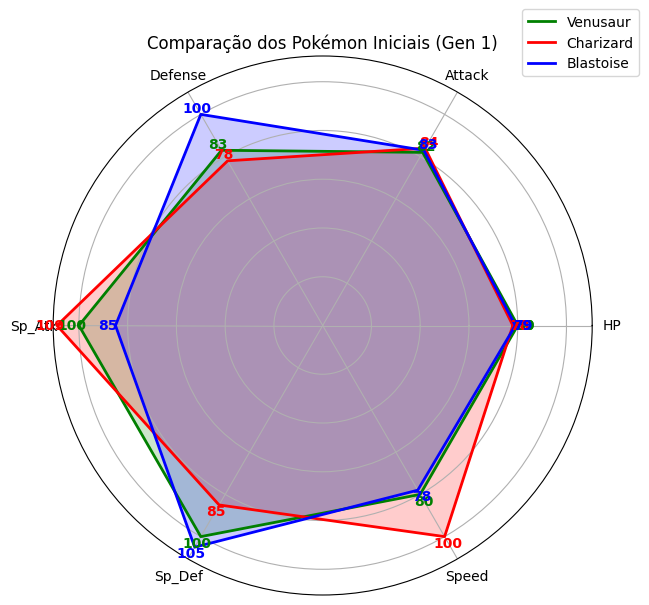

In [45]:
starters3 = df[df['Name'].isin(['Venusaur', 'Charizard', 'Blastoise'])]

# 1. Selecionar apenas os atributos relevantes
attributes = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
values = starters3[attributes].values

# 2. Criar ângulos para o gráfico de radar
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

# 3. Criar o gráfico de radar
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Cores para cada Pokémon
colors = ['green', 'red', 'blue']
labels = starters3['Name'].values

# Adicionar os valores numéricos, com deslocamento para evitar sobreposição 
offsets = {'Venusaur': (15, 2), 'Charizard': (10, -5), 'Blastoise': (-5, -5)}

for i, (label, color) in enumerate(zip(labels, colors)):
    stats = values[i].tolist()
    stats += stats[:1]  # Fechar o gráfico
    
    ax.plot(angles, stats, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, stats, color=color, alpha=0.2)  # Preenchimento

            # Adicionar os valores no meio do gráfico
    for angle, stat in zip(angles, stats):
        ax.text(angle, stat + 3, str(stat), ha='center', va='center', fontsize=10, color=color, fontweight='bold')

# 4. Configurações do gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)
ax.set_yticklabels([])
plt.title("Comparação dos Pokémon Iniciais (Gen 1)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

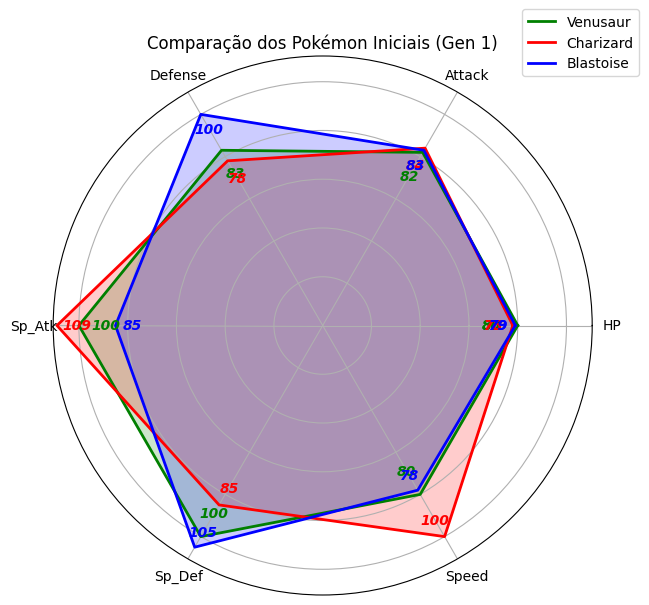

In [66]:
# 1. Filtrar apenas os Pokémon iniciais da 1ª geração
starters3 = df[df['Name'].isin(['Venusaur', 'Charizard', 'Blastoise'])]

# 2. Selecionar apenas os atributos relevantes
attributes = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
values = starters3[attributes].values

# 3. Criar ângulos para o gráfico de radar
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

# 4. Criar o gráfico de radar
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Cores para cada Pokémon
colors = ['green', 'red', 'blue']
labels = starters3['Name'].values

# Adicionar os valores numéricos, com deslocamento para evitar sobreposição 
offsets = {'Venusaur': (0, -11), 'Charizard': (50, -8), 'Blastoise': (-5, -7)}

for i, (label, color) in enumerate(zip(labels, colors)):
    stats = values[i].tolist()
    stats += stats[:1]  # Fechar o gráfico
    
    ax.plot(angles, stats, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, stats, color=color, alpha=0.2)  # Preenchimento

    # Adicionar os valores com deslocamento
    dx, dy = offsets[label]  # Obtém o deslocamento específico para cada Pokémon
    for angle, stat in zip(angles, stats):
        ax.text(angle, stat + dy, str(stat), ha='center', va='center', fontsize=10, 
                color=color, fontweight='bold', fontstyle='italic')


# 6. Configurações do gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)
ax.set_yticklabels([])
plt.title("Comparação dos Pokémon Iniciais (Gen 1)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

In [64]:
starters3

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Catch_Rate,Body_Style
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,45,quadruped
5,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Red,True,0.875,Monster,Dragon,True,45,bipedal_tailed
8,Blastoise,Water,Water,530,79,83,100,85,105,78,1,False,Blue,True,0.875,Monster,Water_1,True,45,bipedal_tailed


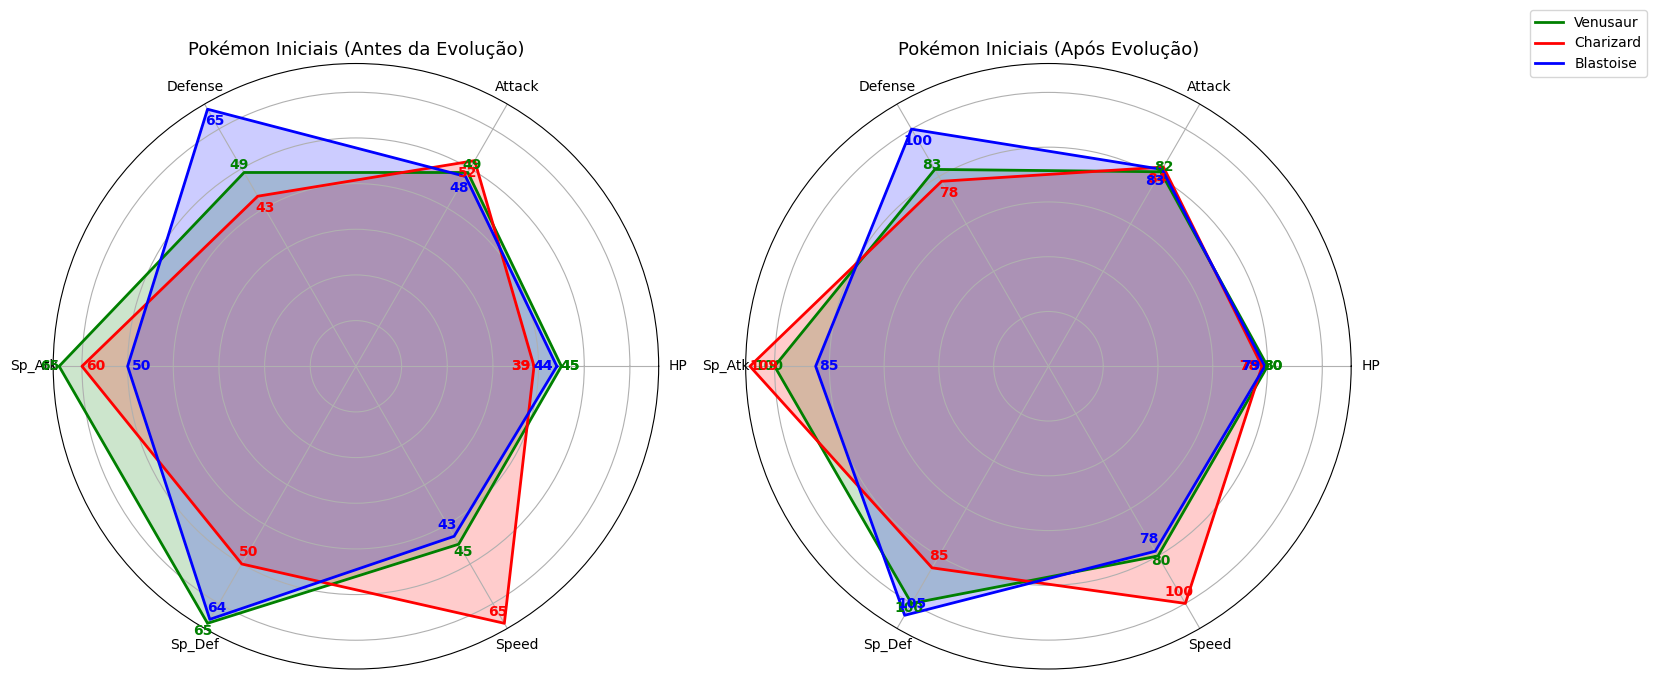

In [67]:
# Criando uma figura com duas subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(polar=True))

# Lista de Pokémon antes e depois da evolução
starters1 = df[df['Name'].isin(['Bulbasaur', 'Charmander', 'Squirtle'])]
starters3 = df[df['Name'].isin(['Venusaur', 'Charizard', 'Blastoise'])]

# Atributos a serem analisados
attributes = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
num_vars = len(attributes)

# Criar ângulos para os gráficos
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

# Cores para cada Pokémon
colors = ['green', 'red', 'blue']

# Criar função para gerar cada gráfico
def plot_radar(ax, data, title):
    labels = data['Name'].values
    values = data[attributes].values
    
    # Offsets para separar os números nos gráficos
    offsets = {'Bulbasaur': (10, 2), 'Charmander': (5, -3), 'Squirtle': (-5, -3),
               'Venusaur': (15, 2), 'Charizard': (10, -5), 'Blastoise': (-5, -5)}

    for i, (label, color) in enumerate(zip(labels, colors)):
        stats = values[i].tolist()
        stats += stats[:1]  # Fechar o gráfico
        
        ax.plot(angles, stats, color=color, linewidth=2, linestyle='solid', label=label)
        ax.fill(angles, stats, color=color, alpha=0.2)  # Preenchimento

        # Adicionar os valores numéricos
        offset_x, offset_y = offsets[label]
        for angle, stat in zip(angles, stats):
            ax.text(angle, stat + offset_y, str(stat), ha='center', va='center', fontsize=10, color=color, fontweight='bold')

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    ax.set_yticklabels([])
    ax.set_title(title, fontsize=13)

# Gerar gráficos
plot_radar(axes[0], starters1, "Pokémon Iniciais (Antes da Evolução)")
plot_radar(axes[1], starters3, "Pokémon Iniciais (Após Evolução)")

# Ajustar layout
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))
plt.show()


In [70]:
# Podemos observar que apesar das evoluções os iniciais mantiveram suas características.
# Charizard com altíssimo poder de ataque 
# Blastoise com características mais defensivas
# Já Venusaur em sua última forma observa-se um equilíbrio de atributos. Vale destacar também que foi o único que não possuiu um crescimento destacável de atributos